# **Workshop #1 - Notebook 2: Exploratory analysis of the dataset (EDA)**
This notebook is focused on performing exploratory data analysis (EDA) on the candidates dataset. EDA is a crucial step in the data analysis process as it helps us understand the structure and characteristics of the data. By analyzing the dataset, we can uncover patterns, relationships, and potential insights that can guide further analysis and decision-making.

In this notebook, we will explore the dataset using various statistical and visual techniques. We will examine the distribution of variables and investigate relationships between different variables. Through this analysis, we aim to gain a comprehensive under of the dataset and generate meaningful insights.

---

## ***Reading the data***

### **Importing the dependencies**

Estaremos usando Pandas para realizar el análisis de los datos a partir de la estructura del dataframe, y Matplotlib y Seaborn para la realización de ciertos gráficos que ayudarán a explicar mejor los insights obtenidos a partir de los datos.

---

We will be using Pandas to perform the analysis of the data from the dataframe structure, and Matplotlib and Seaborn for the realization of certain graphs that will help to better explain the insights obtained from the data. 

In [92]:
#import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import connection

#from dotenv import load_dotenv
#from sqlalchemy import create_engine

### **Creating the engine**
La conexión se relegó a un script de Python denominado *connection.py*: de este script usamos principalmente la función creating_engine, que es la encargada de establecer la conexión mediante SQLAlchemy a una base de datos PostgreSQL.

---

The connection was relegated to a Python script called *connection.py*: from this script we mainly use the creating_engine function, which is in charge of establishing the connection via SQLAlchemy to a PostgreSQL database.

In [93]:
engine = connection.creating_engine()

In [94]:
# load_dotenv("../env/.env")

# driver = os.getenv("PG_DRIVER")

# user = os.getenv("PG_USER")
# password = os.getenv("PG_PASSWORD")

# host = os.getenv("PG_HOST")
# port = os.getenv("PG_PORT")

# database = os.getenv("PG_DATABASE")

In [95]:
# url = f"{driver}://{user}:{password}@{host}:{port}/{database}"

# engine = create_engine(url)

### **Loading the dataset**
Leemos el dataset desde una tabla que almacena nuestros datos: esta tabla se encuentra en una base de datos de PostgreSQL que se encuentra vinculada a el motor creado con SQLAlchemy.

---

We read the dataset from a table that stores our data: this table is located in a PostgreSQL database that is linked to the engine created with SQLAlchemy.

In [96]:
df = pd.read_sql_table("candidates_raw", engine, parse_dates=["Application Date"])
df

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


## ***Data preparation***

Columns are renamed with a ***Snake case*** format in order to facilitate queries using `df.query()`.

In [97]:
renamed_columns = {
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Email': 'email',
    'Application Date': 'application_date',
    'Country': 'country',
    'YOE': 'yoe',
    'Seniority': 'seniority',
    'Technology': 'technology',
    'Code Challenge Score': 'code_challenge_score',
    'Technical Interview Score': 'technical_interview_score'
}

df = df.rename(columns=renamed_columns)

## ***Data understanding***

### **Data columns' info**

El anterior informe nos otorga múltiples conclusiones:

* Los Dtypes de las distintas columnas resultan apropiadas para realizar un análisis del dataset sin muchas complicaciones: **no se requiere una transformación profunda** en este aspecto.

* Existen 50000 registros en el dataframe. Teniendo esto en cuenta al revisar el conteo de datos que no son nulos podemos concluir que **no hay ningún dato nulo**.

---

The previous report gives us multiple conclusions:

* The Dtypes of the different columns are appropriate to perform an analysis of the dataset without many complications: **no deep transformation is required** in this aspect.

* There are 50,000 entries in the dataframe. Taking this into account when reviewing the count of non-null data we can conclude that **there is no null data**.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   first_name                 50000 non-null  object        
 1   last_name                  50000 non-null  object        
 2   email                      50000 non-null  object        
 3   application_date           50000 non-null  datetime64[ns]
 4   country                    50000 non-null  object        
 5   yoe                        50000 non-null  int64         
 6   seniority                  50000 non-null  object        
 7   technology                 50000 non-null  object        
 8   code_challenge_score       50000 non-null  int64         
 9   technical_interview_score  50000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.8+ MB


### **Reviewing if there's any duplicate row**

**No hay ningún registro duplicado** en el dataset.

---

**There isn't any duplicated entry** in the dataset.

In [99]:
df.duplicated().sum()

0

### **Reviewing if there's any null values**

Con esta sección confirmamos que **no hay ningún dato nulo** en el conjunto de datos que tenemos.

---

With this section we confirm that **there is no null data** in the dataset we have.

In [100]:
df.isnull().sum()

first_name                   0
last_name                    0
email                        0
application_date             0
country                      0
yoe                          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64

### **Counting the unique values in each column**

Teniendo en cuenta que **existen 50.000 registros**, resulta inusual ver que hay varios emails que se repiten en el dataframe. Esto indicaría que posiblemente habría **167 personas que reaplicaron** (calculando a partir de la diferencia entre el total y el conteo de los emails).

---

Considering that there are 50.000 records, it is unusual to see that there are several repeating emails in the dataframe. This would indicate that there would possibly be **167 people who reapplied** (calculating from the difference between the total and the emails' count).

In [101]:
df.nunique()

first_name                    3007
last_name                      474
email                        49833
application_date              1646
country                        244
yoe                             31
seniority                        7
technology                      24
code_challenge_score            11
technical_interview_score       11
dtype: int64

#### ***Let's analyze those records***

A partir de la longitud de los valores únicos de los Emails obtenemos que existen **165 direcciones de correos repetido**s en nuestro dataset: inclusive existen 2 direcciones que se repiten 3 veces.

---

From the length of unique values of the Emails we obtain that there are **165 repeated email addresses** in our dataset: there are even 2 addresses that are repeated 3 times.

In [102]:
duplicated_emails = df.loc[df.duplicated(subset=['email'], keep=False)]
duplicated_emails["email"].value_counts()

email
fern70@gmail.com                3
marianne31@yahoo.com            3
matilda17@gmail.com             2
candelario19@hotmail.com        2
furman49@gmail.com              2
                               ..
jasper81@gmail.com              2
desmond85@yahoo.com             2
bertrand65@hotmail.com          2
hildegard_prohaska@yahoo.com    2
easter75@gmail.com              2
Name: count, Length: 165, dtype: int64

### **Numerical analysis of the data**

En este analisis observamos que las fechas datan desde el 1 de enero de 2018 hasta el 4 de julio de 2022: tener en cuenta este detalle dado que explica la poca cantidad de datos para 2022.

Además, arroja que el promedio de años de experiencia son de 15.29 años, sin embargo, los valores son muy variados como observamos en la desviación estándar, que cuenta con un valor muy alto.

Con respecto al puntaje del reto de código y la entrevista técnica, ambas cuentan con promedios de 5, aproximadamente. Estos promedios son demasiado regulares e indican que la cantidad de personas aceptadas será, probablemente, menor que la mitad de los que se encuentran en el listado.

---

In this analysis we observe that the dates are from January 1, 2018 to July 4, 2022: this detail should be taken into account since it explains the small amount of data for 2022.

In addition, it shows that the average years of experience are 15.29 years, however, the values are very varied as we observe in the standard deviation, which has a very high value.

With respect to the code challenge score and the technical interview, both have averages of approximately 5. These averages are too regular and indicate that the number of people accepted will probably be less than half of those listed.

In [103]:
df.describe()

,application_date,yoe,code_challenge_score,technical_interview_score
count,50000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000
std,NaN,8.830652,3.166896,3.165082


### **Analyzing Code Challenge and Technical Interview Scores**

Existe una **distribución bastante dispersa** de los datos en ambos puntajes, lo que lleva a que la frecuencia de los puntajes se bastante similar entre sí.

---

There is a **fairly dispersed distribution** of the data in both scores, which leads to the frequency of the scores being fairly similar to each other.

In [104]:
score_counts = (df[['code_challenge_score', 'technical_interview_score']].agg(pd.Series.value_counts, normalize=False)
                .sort_index()
                .rename_axis('score'))
score_counts

,code_challenge_score,technical_interview_score
score,,
0,4502,4539
1,4590,4588
2,4579,4500
3,4678,4528
4,4521,4578
5,4479,4527
6,4419,4471
7,4506,4578
8,4619,4555


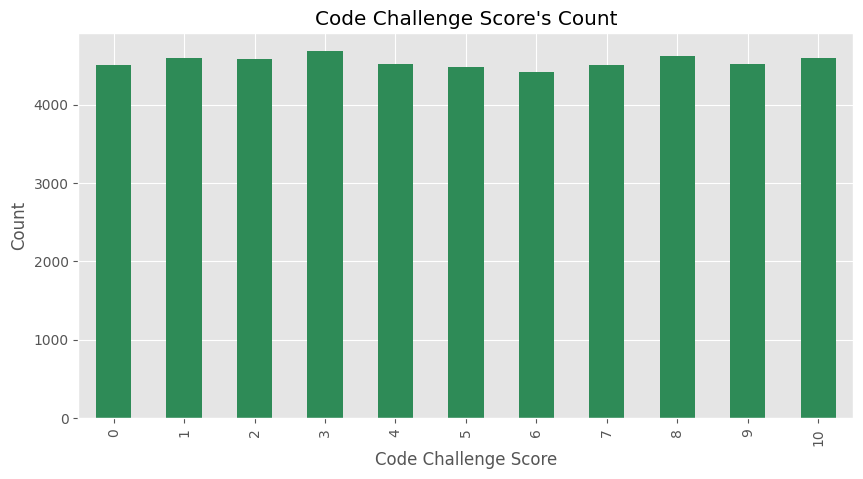

In [105]:
code_score = (df['code_challenge_score']
                       .value_counts()
                       .sort_index())

code_score.plot(kind='bar', figsize=(10, 5), title="Code Challenge Score's Count", color='seagreen')
plt.xlabel('Code Challenge Score')
plt.ylabel('Count')
plt.show()

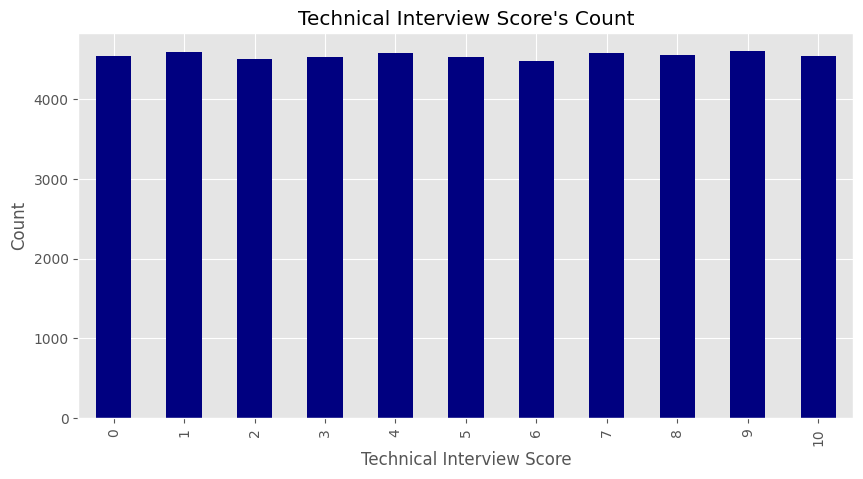

In [106]:
technical_interview_score = (df['technical_interview_score']
                            .value_counts()
                            .sort_index())

technical_interview_score.plot(kind='bar', figsize=(10, 5), title="Technical Interview Score's Count", color="navy")
plt.xlabel('Technical Interview Score')
plt.ylabel('Count')
plt.show()

### **Analyzing aspects of the date of application**

Vamos a extraer **el año y el mes** del campo de la fecha de aplicación. Con estos datos, analizaremos la **frecuencia de inscritos por año** y la **disponibilidad de los datos** en estos periodos de tiempo.

---

We will extract **the year and month** from the application date field. With these data, we will analyze the **frequency of enrollees per year** and the **availability of the data** in these time periods.

In [107]:
df['year'] = df['application_date'].dt.year
df['month'] = df['application_date'].dt.month_name()

De 2018 a 2021 hay una **tendencia constante y persistente** de datos, sin embargo, resulta necesario explorar a profundidad los valores de año 2022 dada **su baja frecuencia** en comparación a los otros años.

---

From 2018 to 2021 there is a **steady and persistent** trend of data, however, it is necessary to explore in depth the values of year 2022 given **its low frequency** compared to the other years.

In [108]:
year_counts = (df['year'].value_counts()
               .sort_index())
year_counts

year
2018    11061
2019    11009
2020    11237
2021    11051
2022     5642
Name: count, dtype: int64

La siguiente Serie nos devuelve la **frecuencia de candidatos inscritos** *por cada mes* en 2022. Si bien existe una tendencia estable de inscritos desde Enero hasta Junio, **en Julio existe una caída significativa**. Desde Agosto en adelante los datos sobre los candidatos **no existen**, razón que soporta el hecho de que en 2022 la cantidad de candidatos **sea tan baja**.

---

The following Series returns the **frequency of candidates enrolled** *for each month* in 2022. While there is a stable trend of registrants from January through June, **in July there is a significant drop**. From August onwards the data on candidates **does not exist**, a reason that supports the fact that in 2022 the number of candidates **is so low**.


In [109]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

monthly_counts = (df.query("year == 2022")
                  .groupby("month")
                  .size()
                  .reindex(month_order))

monthly_counts

month
January      912.0
February     844.0
March        962.0
April        923.0
May          979.0
June         910.0
July         112.0
August         NaN
September      NaN
October        NaN
November       NaN
December       NaN
dtype: float64

## ***Filtering the dataframe: Code Challenge & Tech Interview Score***
---

El siguiente bloque de código realiza un filtrado en el dataframe `df` para seleccionar únicamente aquellos registros que cumplan con la condición de tener un puntaje igual o mayor a 7 tanto en el campo `code_challenge_score` como en el campo `technical_interview_score`. El resultado de este filtrado se guarda en un nuevo dataframe llamado `df_hired`. Este nuevo dataframe contiene únicamente los registros de los candidatos contratados que cumplen con los criterios de puntaje establecidos.

---

The following code block filters the `df` dataframe to select only those records that meet the condition of having a score equal to or greater than 7 in both the `code_challenge_score` field and the `technical_interview_score` field. The result of this filtering is saved in a new dataframe called `df_hired`. This new dataframe contains only the records of the hired candidates that meet the score criteria.

In [110]:
df_hired = df.query("(code_challenge_score & technical_interview_score) >= 7").copy()
df_hired

,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score,year,month
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,2020,April
22,Crawford,Ullrich,bruce.koch7@yahoo.com,2021-01-09,Dominica,14,Junior,Game Development,8,8,2021,January
26,Dorian,Zboncak,kyleigh55@yahoo.com,2020-01-26,Japan,5,Lead,Design,8,10,2020,January
34,Tierra,Romaguera,pete.reichel@yahoo.com,2018-08-21,Panama,9,Senior,Adobe Experience Manager,8,8,2018,August
53,Brian,Wehner,richie.schaefer@gmail.com,2022-02-27,Puerto Rico,18,Senior,Security,10,10,2022,February
...,...,...,...,...,...,...,...,...,...,...,...,...
49932,Alyce,Wehner,alberta_marvin@yahoo.com,2022-04-22,Algeria,4,Lead,Development - CMS Backend,9,10,2022,April
49935,Walton,Kohler,mitchell85@gmail.com,2018-12-15,Uruguay,17,Mid-Level,Database Administration,8,8,2018,December
49978,Danyka,West,susana.ratke@yahoo.com,2021-01-07,Ethiopia,25,Intern,Game Development,9,10,2021,January
49989,Bryana,Pagac,dante8@yahoo.com,2018-01-16,Nigeria,18,Intern,QA Manual,8,10,2018,January


### **Analyzing the technologies used by the hired candidates**

Observamos que las dos tecnologías con mayor cantidad de candidatos contratados fue **DevOps** y **Game Development**: su notoriedad es considerable dada la **diferencia en cantidad** con respecto al resto de tecnologias.

---

We observed that the two technologies with the highest number of candidates hired were **DevOps** and **Game Development**: their notoriety is considerable given the **difference in quantity** with respect to the rest of the technologies.


In [111]:
df_technology_count = (df_hired.groupby('technology')
                       .size()
                       .sort_values(ascending=False))

df_technology_count

technology
Game Development                           325
DevOps                                     292
Adobe Experience Manager                   184
System Administration                      177
Development - CMS Backend                  175
Database Administration                    168
Development - FullStack                    167
Client Success                             167
Mulesoft                                   166
Development - Frontend                     164
Business Analytics / Project Management    163
Salesforce                                 160
Security Compliance                        159
Development - Backend                      159
QA Manual                                  158
Development - CMS Frontend                 157
Security                                   156
Design                                     152
Business Intelligence                      151
Social Media Community Management          149
QA Automation                              149
Sa

In [112]:
def color_palette(df):
    n_colors = len(df)
    return sns.color_palette("light:#5A9", n_colors=n_colors)

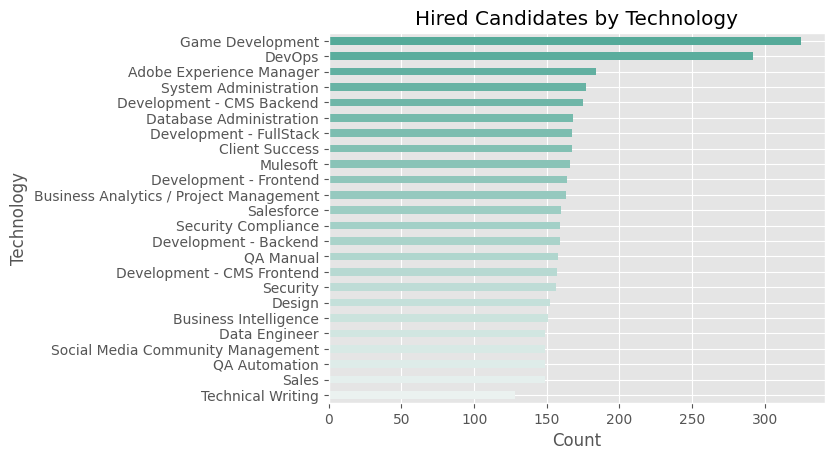

In [113]:
df_technology_count = df_technology_count.sort_values()

df_technology_count.plot(kind='barh', color=color_palette(df_technology_count))

plt.xlabel('Count')
plt.ylabel('Technology')
plt.title('Hired Candidates by Technology')

plt.show()

### **Analyzing the countries of the hired candidates**

Analizando los 10 países de procedencia con la mayor cantidad de candidatos contratados encontramos una distribución que varía en muy pequeñas cantidades; esto se debe a la gran cantidad de países que se encuentran a analizar, indicando una gran dispersión en los datos existentes.

---

Analyzing the 10 countries of origin with the highest number of candidates hired, we find a distribution that varies in very small amounts; this is due to the large number of countries to be analyzed, indicating a large dispersion in the existing data.

In [114]:
df_country_count = (df_hired.groupby('country')
                       .size()
                       .sort_values(ascending=False))

df_country_count

country
Niger                                30
Heard Island and McDonald Islands    29
Sri Lanka                            28
Guatemala                            26
Indonesia                            26
                                     ..
Guam                                  9
Armenia                               9
Montenegro                            9
Gambia                                9
American Samoa                        7
Length: 244, dtype: int64

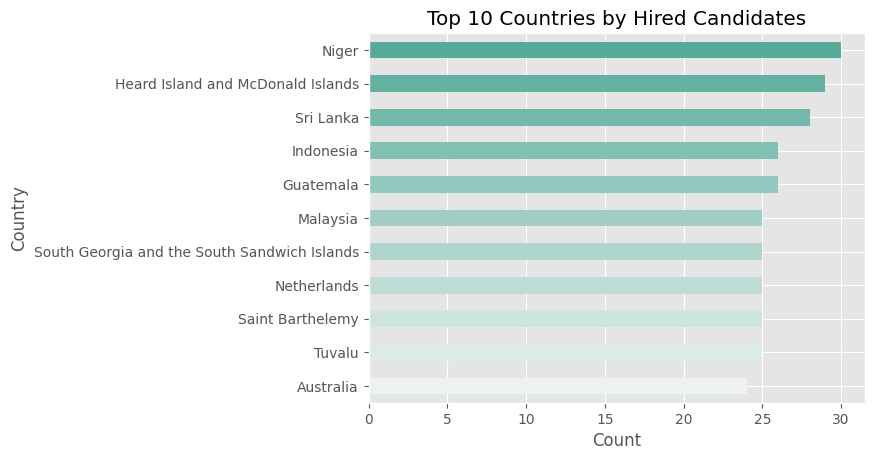

In [115]:
df_country_count = df_country_count[0:11].sort_values()

df_country_count.plot(kind='barh', color=color_palette(df_country_count))

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries by Hired Candidates')

plt.show()

### **Analyzing the seniority and YOE of the hired candidates**

Si bien en Seniority no existe esa dispersión tan amplia que existia en los países, sí se sigue con el patrón de una distribución que varía en pequeñas cantidades con respecto a los valores anteriores. De este caso se pueden destacar que los cargos con mayor cantidad de contratados fueron en la categoría de Intern y Trainee.

---

Although Seniority doesn't have the wide dispersion that existed in the countries' case, it does follow the pattern of a distribution that varies in small amounts with respect to the previous values. In this case, it is worth noting that the positions with the highest number of hires were in the Intern and Trainee categories.

In [116]:
df_seniority_count = (df_hired.groupby('seniority')
                       .size()
                       .sort_values(ascending=False))

df_seniority_count

seniority
Intern       615
Trainee      603
Junior       592
Senior       585
Architect    582
Mid-Level    576
Lead         571
dtype: int64

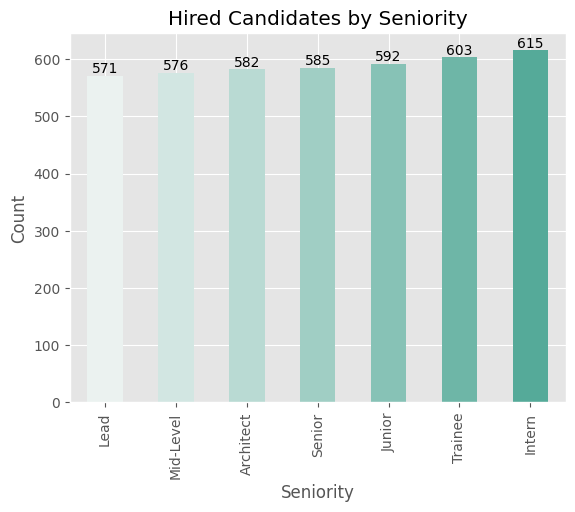

In [117]:
df_seniority_count = df_seniority_count.sort_values()

df_seniority_count.plot(kind='bar', color=color_palette(df_seniority_count))

for i, v in enumerate(df_seniority_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Seniority')
plt.ylabel('Count')
plt.title('Hired Candidates by Seniority')

plt.show()

Es claro que para que un candidato tenga un Leader Seniority debe haber tenido amplios años de experiencias (YOE). Esta relación de YOE y Seniority también se puede observar en Intern y Trainee, los cuales deben de tener pocos años de experiencia: vamos a observar si es el caso obteniendo el promedio de YOE para cada Seniority.

---

It's clear that for a candidate to have a Leader Seniority he/she must have had extensive years of experience (YOE). This relationship of YOE and Seniority can also be observed in Intern and Trainee, which must have few years of experience: let's see if this is the case by obtaining the average YOE for each Seniority.

In [118]:
seniority_avg_yoe = (df.groupby('seniority')['yoe']
                     .mean()
                     .sort_values(ascending=False))
seniority_avg_yoe

seniority
Intern       15.406892
Lead         15.365578
Architect    15.345105
Junior       15.324930
Mid-Level    15.213291
Trainee      15.178616
Senior       15.174529
Name: yoe, dtype: float64

Como se observa en los resultados de arriba y en la gráfica de abajo, hay inconsistencias entre la Seniority y los años de experiencia (YOE). Por ejemplo, encontramos el caso de Intern donde el promedio de YOE para sus candidatos es de 15.41 años, ligeramente mayor que Lead, un cargo que requiere un valor alto de YOE y que cuenta con un promedio de 15.37 años. El mismo caso se puede observar con Trainee, que cuenta con un YOE exageradamente alto para lo que el Seniority realmente representa.

---

As can be seen in the results above and in the graph below, there are inconsistencies between Seniority and years of experience (YOE). For example, we find the case of Intern where the average YOE for its candidates is 15.41 years, slightly higher than Lead, a position that requires a high YOE value and has an average of 15.37 years. The same case can be observed with Trainee, which has an exaggeratedly high YOE for what the role really represents.

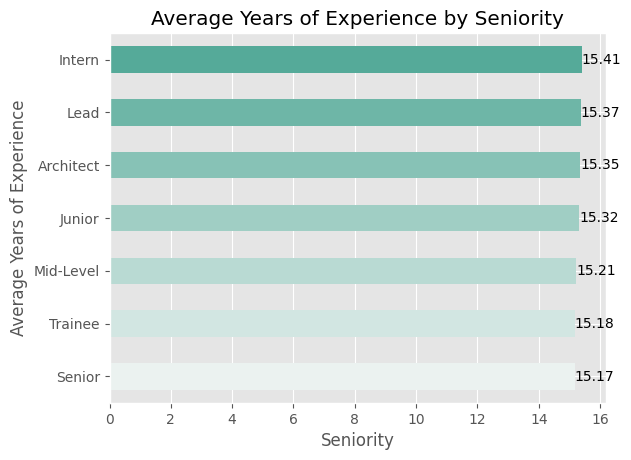

In [119]:
seniority_avg_yoe = seniority_avg_yoe.sort_values(ascending=True)
seniority_avg_yoe.plot(kind='barh', color=color_palette(seniority_avg_yoe))

plt.xlabel('Seniority')
plt.ylabel('Average Years of Experience')
plt.title('Average Years of Experience by Seniority')

for i, v in enumerate(seniority_avg_yoe.values):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center')

plt.show()

## **Conclusions and Findings**

Dada la aleatoriedad de los datos generados, muchas relaciones entre variables son incongruentes. Sin embargo, son relaciones que, dado un dataset con datos reales, deben ser planteadas con el fin de realizar hallazgos pertinentes al contexto a analizar.


* Given the randomness of the data generated, many relationships between variables are incongruent. However, these are relationships that, given a dataset with real data, must be posed in order to make findings relevant to the context to be analyzed.

---

Las tecnologías en las que se especializan los candidatos pueden ser sintetizadas en una menor cantidad de categorías con el fin de facilitar el análisis a futuro mediante las gráficas del dashboard.

* The technologies in which candidates specialize can be synthesized into a smaller number of categories in order to facilitate future analysis through dashboard graphs.

---

* There are a significant number of candidates who apply more than once.

* There is an irregular and inconsistent correlation between years of experience (YOE) and the candidate's role (Seniority).
